<a href="https://colab.research.google.com/github/francomanca93/analisis-de-datos/blob/aplicaciones/3-Aplicando-pandas/17_Series_de_tiempo_y_visualizacioes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Tiempo

En las lecturas previas se aprendio a como trabajar con **variables nulas** y a como darle formato a las **variables de tipo tiempo**. 

En esta sección se vera como utilizar las herramientas anteriores y como trabajar con **series de tiempo**. Se utilizará una base de dato que tiene información sobre el **coronavirus**. La misma la podemos encontrar en el siguiente enlace a la base de datos de [covid-19](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/analisis-de-datos-con-pandas/db/'
!ls

/content/drive/My Drive/Colab Notebooks/analisis-de-datos-con-pandas/db
covid_19_data.csv	test.csv     test.parquet
london_merged.csv	test.gsheet  test.pkl
Meteorite_Landings.csv	test.hdf     test-separacion-diferente.csv
poblacion.csv		test.json    test.xlsx


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('covid_19_data.csv')
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
83406,83407,08/09/2020,Zaporizhia Oblast,Ukraine,2020-08-10 04:34:55,937.0,22.0,652.0
83407,83408,08/09/2020,Zeeland,Netherlands,2020-08-10 04:34:55,918.0,69.0,0.0
83408,83409,08/09/2020,Zhejiang,Mainland China,2020-08-10 04:34:55,1273.0,1.0,1268.0
83409,83410,08/09/2020,Zhytomyr Oblast,Ukraine,2020-08-10 04:34:55,2131.0,41.0,1524.0


## Da formato tiempo a una columna

Vamos a darle un poco de formato al dataframe tipo tiempo a la segunda columna:

In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

Vamos a trabajar solo con algunas columnas de dataframe, para ver las columnas lo hacemos con **list(df)**

In [6]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [7]:
df = df[[
         'ObservationDate',
         'Country/Region',
         'Confirmed',
         'Deaths',
         'Recovered'
         ]]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
83406,2020-08-09,Ukraine,937.0,22.0,652.0
83407,2020-08-09,Netherlands,918.0,69.0,0.0
83408,2020-08-09,Mainland China,1273.0,1.0,1268.0
83409,2020-08-09,Ukraine,2131.0,41.0,1524.0


## Trabajando con groupby

Vamos a crear un nuevo groupby, utilizaremos como indices a las fechas.

In [8]:
df_time = df.groupby('ObservationDate').sum()
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-05,18811953.0,707820.0,11356275.0
2020-08-06,19097149.0,714940.0,11545401.0
2020-08-07,19378036.0,721324.0,11737927.0


En este caso el tiempo ha quedado como el indice del dataframe

In [9]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [10]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

Cuando tenemos dos series con un sistema de indices por fecha podemos realizar operaciones entre las mismas

In [11]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

## Agregando datos faltantes iniciales.

Ahora queremos ver como ha ido aumentando dia tras dia la cifra del covid

In [12]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-05,18811953.0,707820.0,11356275.0
2020-08-06,19097149.0,714940.0,11545401.0
2020-08-07,19378036.0,721324.0,11737927.0


In [13]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-05,271164.0,7084.0,221540.0
2020-08-06,285196.0,7120.0,189126.0
2020-08-07,280887.0,6384.0,192526.0


Incluso podriamos ver el promedio de coronavirus por dia hasta la fecha.

In [14]:
df_time.diff().mean()

Confirmed    99305.640
Deaths        3656.545
Recovered    60578.985
dtype: float64

En el dataframe que creamos la primer fila la tenemos con valores nulos ya que la función diff() el valor de la fila con el anterior, y como la primera no tiene con quien restar el valor es NaN.

In [15]:
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-05,271164.0,7084.0,221540.0
2020-08-06,285196.0,7120.0,189126.0
2020-08-07,280887.0,6384.0,192526.0


Vamos a usar fillna() para completar el registro

In [16]:
df_time.head(1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0


Generamos un diccionario con el registro para meterlo en el dataframe creado, lo copiamos y lo modificamos.

In [17]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [18]:
df_diff = df_diff.fillna(
    {'Confirmed': 555.0,
     'Deaths': 17.0,
     'Recovered': 28.0})

Ahora podemos ver el dataframe con el data faltante

In [19]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-05,271164.0,7084.0,221540.0
2020-08-06,285196.0,7120.0,189126.0
2020-08-07,280887.0,6384.0,192526.0


Y podemos ver las suma acumulativa 

In [20]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-05,18811953.0,707820.0,11356275.0
2020-08-06,19097149.0,714940.0,11545401.0
2020-08-07,19378036.0,721324.0,11737927.0


## Extrayendo valor estadistico del dataframe

Con **resample** podemos hacer algunas estimaciones estadisticas.
Veremos la como utilizar función **resample** en **series de tiempo** para extraer **valor estadistico** de nuestros datos. Como ha ido cambiando el numero de casos observados dada una frecuencia determinada, como el mes o la semana.

Puedo ver los casos cada 7 dias, por ejemplo.

In [21]:
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,25738.0,1102.0,16175.0
2020-03-11,78586.0,3643.0,16436.0
2020-03-18,220794.0,10710.0,26859.0


Tambien podria ver los casos cada 7 dias, pero especificamente cada domingo:

In [22]:
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,21464.0,807.0,17979.0
2020-03-15,57612.0,2637.0,15339.0
2020-03-22,169675.0,8183.0,21209.0


O la suma mensual de casos de covid-19 de forma mensual

In [23]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,771474.0,39166.0,138246.0
2020-04-30,2399359.0,191281.0,836725.0
2020-05-31,2910100.0,138647.0,1626576.0
2020-06-30,4308892.0,139218.0,2711943.0
2020-07-31,7123998.0,168247.0,5015868.0
2020-08-31,2261847.0,51826.0,1746685.0


Contemos cuantos dias tienen los meses, esto nos va a dar una mirada de los  

In [24]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,9,9,9


In [25]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,24886.258065,1263.419355,4459.548387
2020-04-30,79978.633333,6376.033333,27890.833333
2020-05-31,93874.193548,4472.483871,52470.193548
2020-06-30,143629.733333,4640.600000,90398.100000
2020-07-31,229806.387097,5427.322581,161802.193548
2020-08-31,251316.333333,5758.444444,194076.111111


# Series de Tiempo - variables nulas

Vamos a ver en mas profundidad las variables nulas y como trabajar con ellas. Tambien trabajaremos con graficos simples.

## Trabajando con variables nulas

Lo que hicimos antes fue utilizar la función **resample** para extraer valor estadistico segun un intervalo definido por nosotros. Extrajimos la cantidad de observaciones de la cantidad de confirmados, muertos y recuperados por COVID-19 en una **frecuencia mensual**.

Cambiemos nuestra frecuencia y veamos que pasa:

In [26]:
df_diff.resample('12h').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-08-07 00:00:00,280887.0,6384.0,192526.0
2020-08-07 12:00:00,0.0,0.0,0.0
2020-08-08 00:00:00,259470.0,5457.0,201182.0


Para cada intervalo de 12 horas donde yo no tenia datos previamente definidos se autocompleta con **0**, ahora si intento obtener el promedio, tendremos valores nulos:

In [27]:
df_diff.resample('12h').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-08-07 00:00:00,280887.0,6384.0,192526.0
2020-08-07 12:00:00,NaN,NaN,NaN
2020-08-08 00:00:00,259470.0,5457.0,201182.0


Vamos a recuperar nuestra suma y obtener datos nulos, para luego poder trabajar con estos, y lo haremos con nuestro dataframe df_time, el cual tiene nuestros datos originales:

In [31]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-07 00:00:00,19378036.0,721324.0,11737927.0
2020-08-07 12:00:00,NaN,NaN,NaN
2020-08-08 00:00:00,19637506.0,726781.0,11939109.0


Vamos a tratar de recupearar los datos nulos, existen 2 tipos de funciones para completar los valores nulos con los datos superiores o inferiores:

In [32]:
df_cum.bfill()  # Con los datos inferiores completo la celda superior

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-07 00:00:00,19378036.0,721324.0,11737927.0
2020-08-07 12:00:00,19637506.0,726781.0,11939109.0
2020-08-08 00:00:00,19637506.0,726781.0,11939109.0


In [33]:
df_cum.ffill()  # Con los datos superiores completo la celda inferior

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,653.0,18.0,30.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-07 00:00:00,19378036.0,721324.0,11737927.0
2020-08-07 12:00:00,19378036.0,721324.0,11737927.0
2020-08-08 00:00:00,19637506.0,726781.0,11939109.0


Incluso puedo reemplazar todos los valores nulos con valores que yo quiera:

In [35]:
df_cum.fillna(-1000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-07 00:00:00,19378036.0,721324.0,11737927.0
2020-08-07 12:00:00,-1000.0,-1000.0,-1000.0
2020-08-08 00:00:00,19637506.0,726781.0,11939109.0


Una buena opcion para datos nulos en series de tiempo es utilizar la funcion **interpolate**, esta funcion nos completara con un datos interpolado con la fila superior y la inferior, y agregará un posible dato que puede corresponder a dicha fila. Lo que hace es una **interpolación lineal**

In [36]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-07 00:00:00,19378036.0,721324.0,11737927.0
2020-08-07 12:00:00,19507771.0,724052.5,11838518.0
2020-08-08 00:00:00,19637506.0,726781.0,11939109.0


## Agrupando series de tiempo y graficando datos simples

Utilizaremos herramientas de pandas para hacer analisis de series de tiempo, **como agrupar** cuando tenemos columnas de tipo tiempo, utilizando una función llamada **Grouper** y veremos la importancia de trabajar con **intervalos de tiempo** y calcular **suavizados de curvas**, usando **rolling()**.

En general en la naturaleza haremos este tipo de analisis por ejemplo en:
* temperaturas a lo largo de un año.
* cuando realizamos proyecciones financieras.

Creemos una nueva columna, esta será la **tasa de supervivencia** al COVID-19

In [37]:
df_cum['rate-recovered'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-08-07 00:00:00,19378036.0,721324.0,11737927.0,0.962776
2020-08-07 12:00:00,19507771.0,724052.5,11838518.0,0.962884
2020-08-08 00:00:00,19637506.0,726781.0,11939109.0,0.962990


Eliminemos al tiempo como indice y contemplemos un nuevo tipo de base de datos, esto es cuando nuestra variable de tipo tiempo no pertenece al indice

In [56]:
df_cum = df_cum.reset_index()
df_cum

,level_0,index,ObservationDate,Confirmed,Deaths,Recovered,rate
0,0,0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,1,1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2,2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,3,3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,4,4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...,...,...
396,396,396,2020-08-07 00:00:00,19378036.0,721324.0,11737927.0,0.962776
397,397,397,2020-08-07 12:00:00,19507771.0,724052.5,11838518.0,0.962884
398,398,398,2020-08-08 00:00:00,19637506.0,726781.0,11939109.0,0.962990
399,399,399,2020-08-08 12:00:00,19749594.5,729053.5,12027467.0,0.963085


Utilicemos un groupby especial para series de tiempo. Vamos a determinar una frecuencia en la cual haremos nuestra observación estadística, en este caso lo haremos mensual. Trabajaremos con la nueva columna que es la tasa de supervivencia y calcularemos la media.

In [57]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq= 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.960070
2020-04-30,0.936029
2020-05-31,0.933422
2020-06-30,0.945713
2020-07-31,0.957037
2020-08-31,0.962405


Podemos visualizar de forma gráfica lo anterior, cambiemos la frecuencia en la cual haremos nuestro estudio, esta será a un dia.

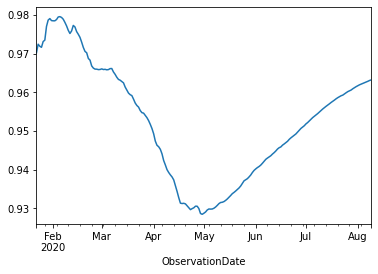

In [58]:
serie = df_cum.groupby(pd.Grouper(key='ObservationDate', freq= '1d'))['rate'].mean()
serie.plot()

Podemos hacer la gráfica anterior visualmente mas agradable haciendo un suavizado. El mismo se realiza calculando los promedios y graficandolos.

Utilicemos la funcion .rolling(), la misma nos permite hacer promedios con ventajas de frecuencia

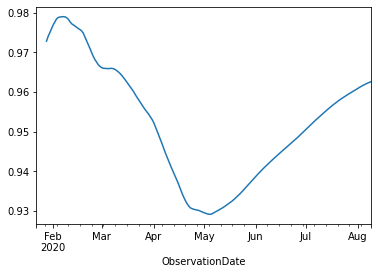

In [60]:
serie.rolling(window=7).mean().plot()

Comparemos ahora las gráficas:

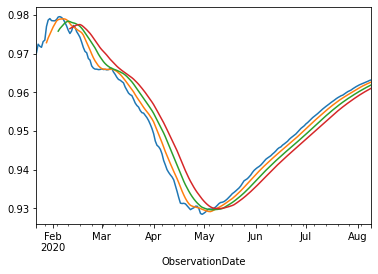

In [65]:
serie.plot()
serie.rolling(window=7).mean().plot()
serie.rolling(window=14).mean().plot()
serie.rolling(window=21).mean().plot()

Tambien podemos hacer la gráfica anterior mas agradable de utilizando la libreria matplotlib y agregando labels

Text(0.5, 1.0, 'Promedio móvil de Tasa de Supervivencia')

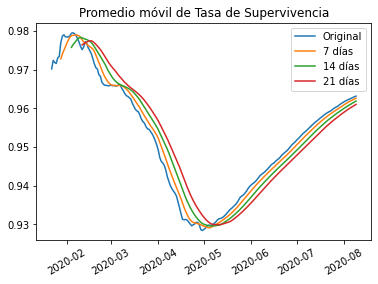

In [68]:
import matplotlib.pyplot as plt

plt.plot(serie, label = 'Original')
plt.plot(serie.rolling(window = 7).mean(), label = '7 días')
plt.plot(serie.rolling(window = 14).mean(), label = '14 días')
plt.plot(serie.rolling(window = 21).mean(), label = '21 días')

plt.xticks(rotation = '30')
plt.legend()
plt.title('Promedio móvil de Tasa de Supervivencia')

Cada vez que aumentamos el tamaño de la ventana para tomar datos y sacar su promedio, aumentamos el suavizado de la gráfica

Por último analicemos como ha ido variando la desviación estandar de nuestra tasa de supervivencia.

In [63]:
import numpy as np

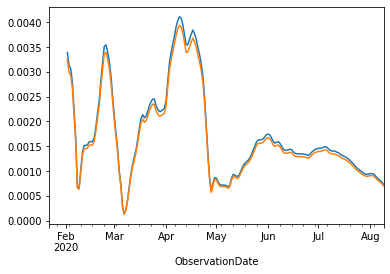

In [64]:
serie.rolling(window=12).std().plot()  # Utilizando una función de pandas
serie.rolling(window=12).apply(lambda x: np.std(x)).plot() # Utilizando una funcion externa, en este caso numpy


La variacion de nuesta variacion estandar es de menos del 0.5%, esto es muy bueno. Como conclusion podemos decir la tasa de supervivencia para buena noticas es alta y es del 97% aproximadamente.